In [2]:
# import all the required libraries and put matplotlib in inline mode to plot on the notebook
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# linear regression
from sklearn import linear_model

# nearest neighbor
from sklearn import neighbors

# regression trees (simple and ensemble)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [10]:
# define the random seed if needed
random_seed = 1234

In [3]:
dataset = pd.read_csv('housing.csv')
dataset.columns
dataset.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [4]:
def plot_approximator(x,y,xp,yp,xlim,ylim,title=""):
    """Plots the original data (x,y) and a set of point (xp,yp) showing the model approximation"""
    font = {'family' : 'sans',
        'size'   : 14}
    plt.rc('font', **font)

    plt.scatter(x, y,  color='blue')
    plt.plot(xp, yp, color='red', linewidth=3)
    plt.xlabel("LSTAT")
    plt.ylabel("MEDV")
    
    if (title!=""):
        plt.title(title)

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.figure(figsize=(12,9))
    plt.show()

In [5]:
def compute_polynomial_model(x, coef, intercept):
    """Compute the polynomial given the input x, the intercept and the coefficients"""
    min_x = min(x)
    max_x = max(x)
    xp = np.arange(min_x, max_x, (max_x-min_x)/100.0)

    x = xp
    yp = intercept

    for w in coef:
        yp = yp + w * x
        x = x * xp
    return xp,yp

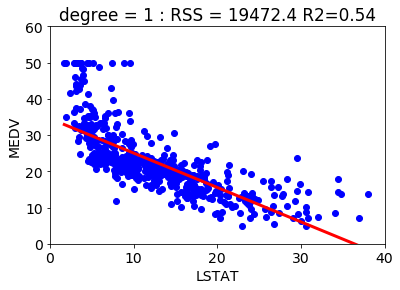

In [6]:
# compute the data inputs
dataset_train_x = dataset['LSTAT'].values
x = dataset_train_x.reshape(506, 1)

# compute the data output
dataset_train_y = dataset.MEDV.values
y = dataset_train_y.reshape(506, 1)

# apply simple linear regression to fit the data
regr = linear_model.LinearRegression()
regr.fit(x, y)

# model output for the input data
yp = regr.predict(x)

# compute the model output as a line
xm,ym = compute_polynomial_model(x[:,0],regr.coef_, regr.intercept_)

# compute rss cost
rss = sum((yp-y)*(yp-y))

# the cost as R^2
r2 = regr.score(x,y)

title = "degree = 1 : RSS = "+str(round(rss[0],1)) + " R2="+str(round(r2,2))

# plot the result
plot_approximator(x[:,0],y,xm,ym,title)

In [7]:
x = dataset['LSTAT'].values.reshape(506, 1)
y = dataset['MEDV'].values.reshape(506, 1)
T = np.linspace(np.min(x), np.max(x), 500)[:, np.newaxis]

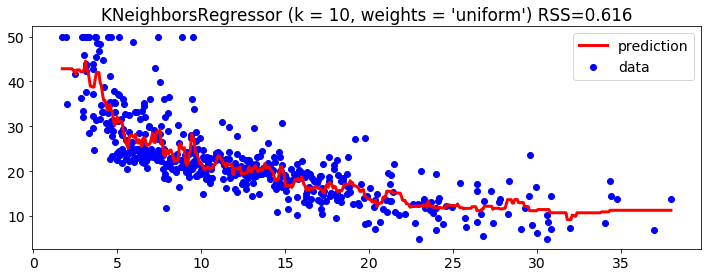

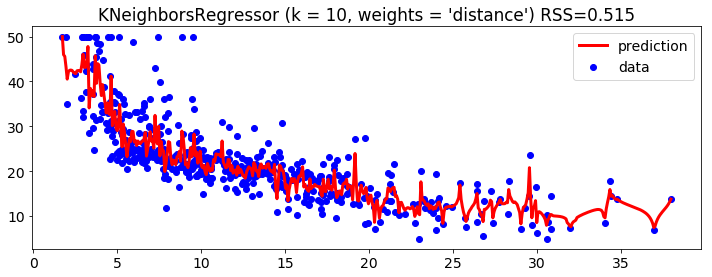

In [8]:
n_neighbors = 10

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(x, y).predict(T)
    
    scores = cross_val_score(knn, x, y, cv=KFold(n_splits=10, random_state=1234, shuffle=True))
    
    plt.figure(figsize=(12,9))
    font = {'family' : 'sans', 'size'   : 14}
    plt.rc('font', **font)
    plt.subplot(2, 1, i + 1)
    plt.scatter(x, y, c='blue', label='data');
    plt.plot(T, y_, c='red', linewidth=3, label='prediction');
    plt.axis('tight');
    plt.legend();
    plt.title("KNeighborsRegressor (k = %i, weights = '%s') RSS=%.3f" % (n_neighbors, weights, np.average(scores)));

plt.show();

In [45]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), n_estimators=300, random_state=random_seed)

In [46]:
X = dataset['LSTAT'].values.reshape(-1,1)

regr_1.fit(X, y.ravel())
regr_2.fit(X, y.ravel())



AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=1234)

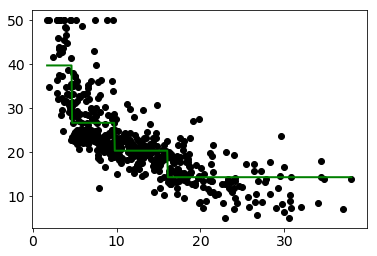

In [47]:
# Predict
Ty_1 = regr_1.predict(T)
Ty_2 = regr_2.predict(T)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(T, Ty_1, c="g", label="n_estimators=1", linewidth=2)
# plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
# plt.xlabel("data")
# plt.ylabel("target")
# plt.title("Boosted Decision Tree Regression")
# plt.legend()
# plt.show()

In [48]:
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(T, Ty_2, c="g", label="n_estimators=1", linewidth=2)
# plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
# plt.xlabel("data")
# plt.ylabel("target")
# plt.title("Boosted Decision Tree Regression")
# plt.legend()
# plt.show()

In [49]:
def TreeModel(x):
    if (x<=9.725):
        if (x<=4.65):
            return 39.718
        else:
            return 26.6463
    else:
        if (x<=16.08):
            return 20.302
        else:
            return 14.2618


In [51]:
TM_y = X.apply(TreeModel)

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [52]:
X.shape

(506, 1)

In [53]:
X.values.shape

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [54]:
X.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [57]:
X.ravel().apply(TreeModel)

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [58]:
np.array(map(TreeModel, x))

array(<map object at 0x1a19258f60>, dtype=object)

In [59]:
TM_y = np.array(map(TreeModel, x))

In [60]:
TM_y

array(<map object at 0x1a19258198>, dtype=object)

In [62]:
TM_y.ravel()

array([<map object at 0x1a19258198>], dtype=object)

In [63]:
vTreeModel = np.vectorize(TreeModel)

In [69]:
TM_y = np.vectorize(TreeModel)(T)

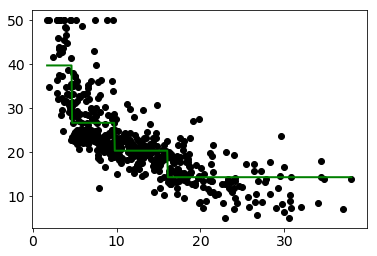

In [70]:
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(T, TM_y.ravel(), c="g", label="n_estimators=1", linewidth=2)